In [3]:
# this lets us see our model prediction and compare it to ground truth.
import tensorflow as tf
import csv
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [4]:
def predict(model, file):
    f = h5py.File(file, 'r')
    NDVI = f['NDVI'][:]
    B12 = f['B12'][:]
    new_prediction = model.predict(np.expand_dims(NDVI, axis=0))
    pred = np.squeeze(new_prediction, axis=0)
    return B12, pred

In [5]:
# function that displays two images side by side
def visualize(actual, prediction):
    fig, axs = plt.subplots(1, 2, figsize=(15, 15)) 
    axs[0].imshow(actual, cmap='Greys')
    axs[1].imshow(prediction, cmap='Greys')
    plt.show()


In [6]:
# function that saves the two images
def save(actual, prediction, name):
    fig, axs = plt.subplots(1, 2, figsize=(15, 15)) 
    axs[0].imshow(actual, cmap='Greys')
    axs[1].imshow(prediction, cmap='Greys')
    plt.savefig(f'{name}.png')

In [7]:
#path = '/home/ec2-user/SageMaker/splits/100/bool/'
path = 'D:\\aws\\bool_100\\'

In [8]:
def eval_model(model, files):
    NDVI_l = []
    B12_l = []
    for file in files:
        end = file.split('/')[-1]
        file = path+end
        f = h5py.File(file, 'r')
        NDVI = f['NDVI'][:]
        B12 = f['B12'][:]
        NDVI_l.append(NDVI)
        B12_l.append(B12)
    NDVI_l = np.asarray(NDVI_l)
    B12_l = np.asarray(B12_l)
    NDVI_l = NDVI_l.reshape(-1, 549, 549, 1)
    B12_l = B12_l.reshape(-1, 549, 549, 1)
    data = model.evaluate(NDVI_l, B12_l)
    return data


In [9]:
def eval_v2(model, file):
    f = h5py.File(file, 'r')
    NDVI = f['NDVI'][:]
    B12 = f['B12'][:]
    new_prediction = model.evaluate(np.expand_dims(NDVI, axis=0), np.expand_dims(B12, axis=0))
    #pred = np.squeeze(new_prediction, axis=0)
    return new_prediction

In [10]:
model_name = "model_16"

In [14]:
model = tf.keras.models.load_model(model_name)

In [11]:
## import csv
rows = []
with open(f"{model_name}_unseen.csv", 'r') as file:
    csvreader = csv.reader(file)
    files = list(csvreader)

In [12]:
files[0][:5]

['/home/ec2-user/fsx/splits/100/bool/L2A_T10TDL_A024034_20200128T190648_19.h5',
 '/home/ec2-user/fsx/splits/100/bool/L1C_T10SFH_A022018_20210524T185833_12.h5',
 '/home/ec2-user/fsx/splits/100/bool/L2A_T10TEK_A034001_20211225T190039_94.h5',
 '/home/ec2-user/fsx/splits/100/bool/L2A_T10TGK_A025836_20220215T184604_17.h5',
 '/home/ec2-user/fsx/splits/100/bool/L2A_T11SMA_A023619_20191230T184214_87.h5']

In [16]:
for file in files[0][:15]:
    end = file.split('/')[-1]
    file = path+end
    eval_v2(model, file)

1/1 [==============================] - 0s 32ms/step - loss: 0.0013


In [17]:
len(files[0])//256

121

In [ ]:
scores = []
start = 0
end = 128
num_evals = len(files[0])//end
for i in range(num_evals):

    batch_files = files[0][start:end]
    try:
        result = eval_model(model, batch_files)
        scores.append(result)
        start += end
        end += end
    except:
        start += end
        end += end
    
    

scores = np.asarray(scores)
s_mean = np.mean(scores, axis=0)
s_std = np.std(scores, axis=0)
s_max = np.max(scores, axis=0)
s_min = np.min(scores, axis=0)

In [15]:
print(s_mean, s_std, s_max, s_min)

0.003625885862857103 0.0008294612873093113 0.004550326615571976 0.0022414091508835554


In [14]:
file = files[0][9]
end = file.split('/')[-1]
file = '/home/ec2-user/SageMaker/splits/100/bool/'+end
#file = 'D:\\aws\\bool_100\\'+end

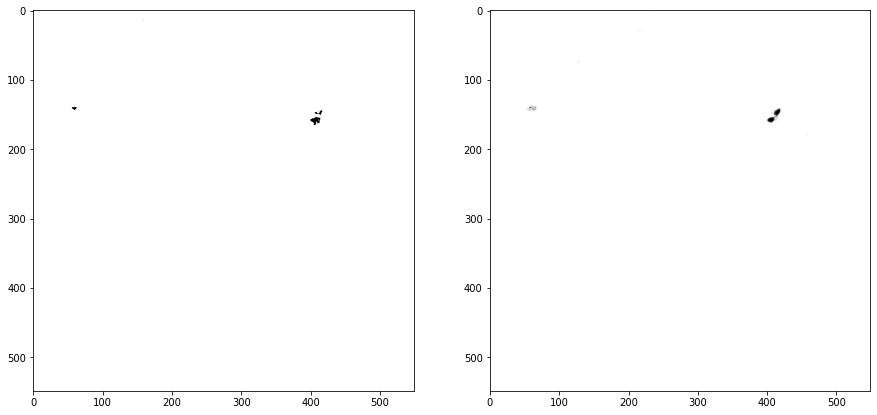

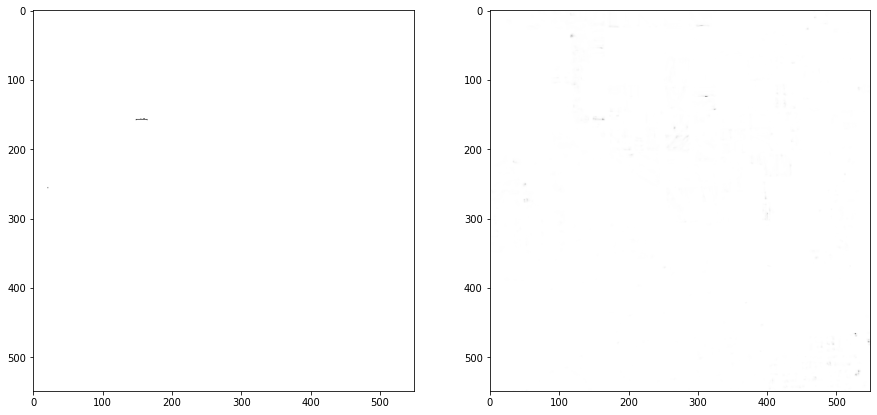

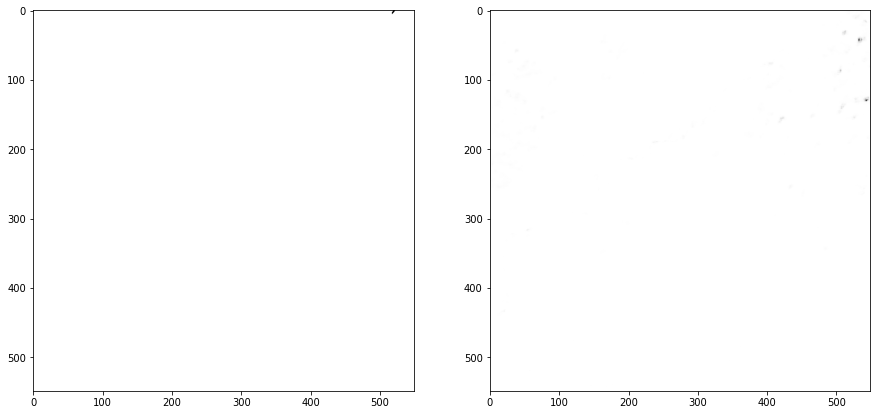

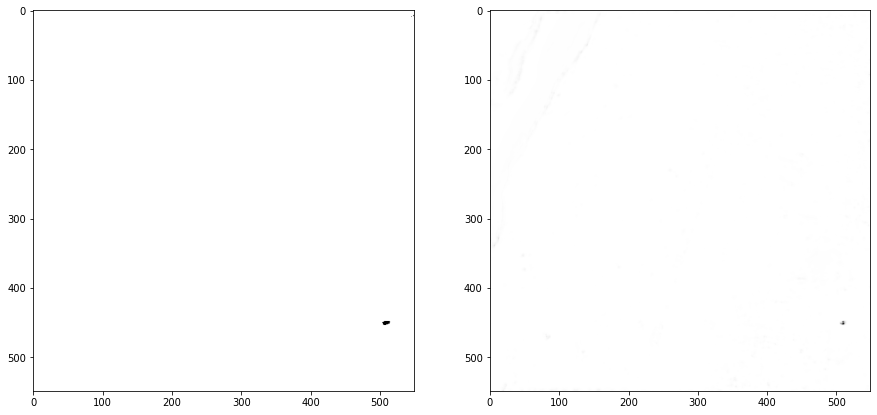

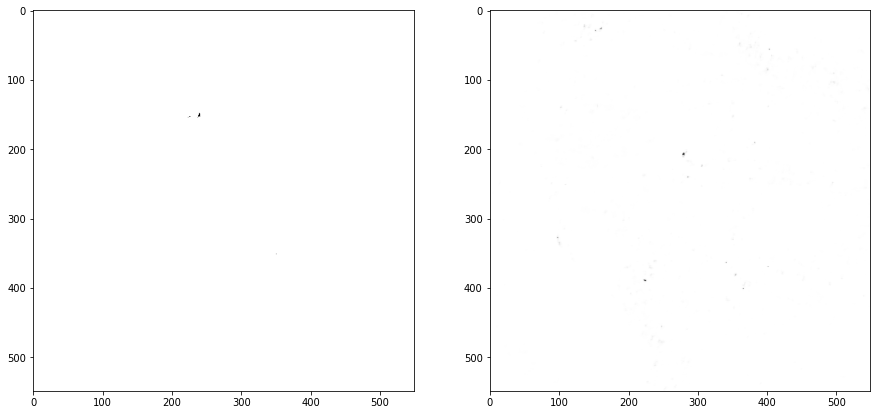

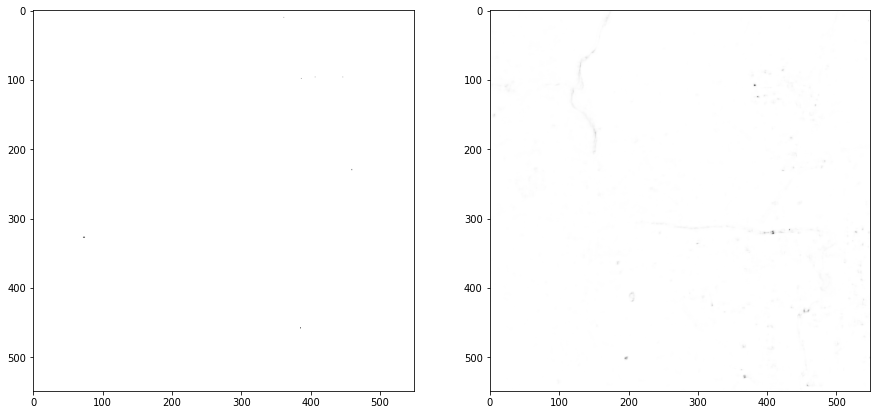

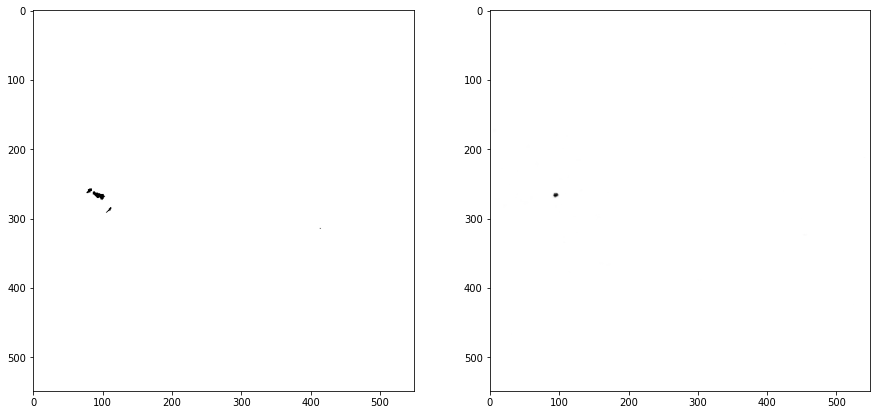

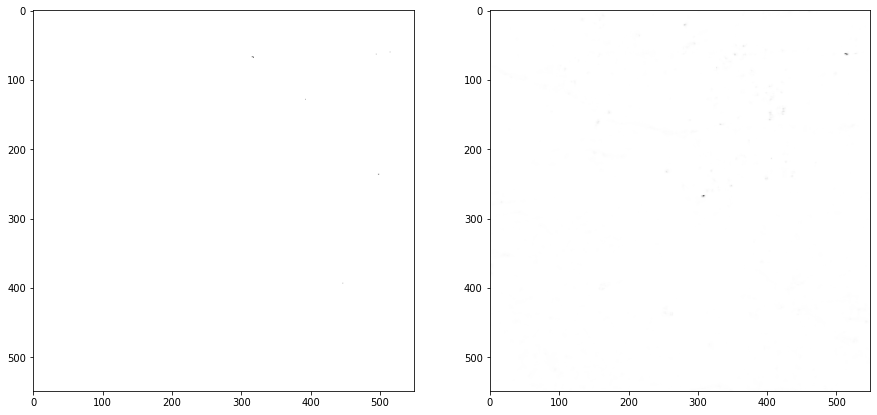

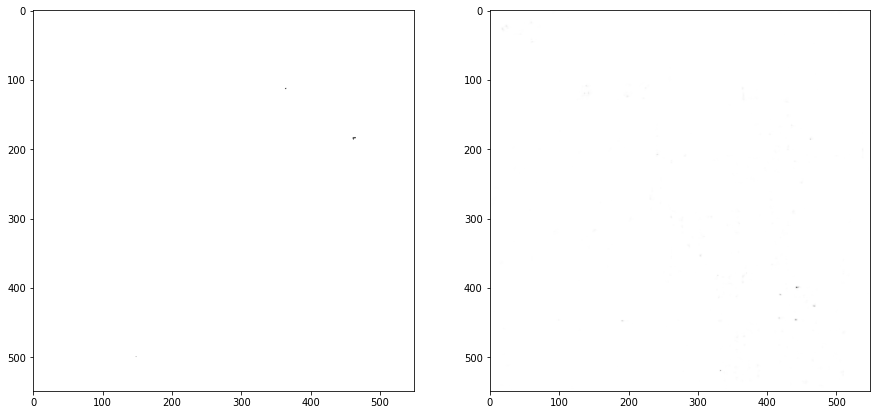

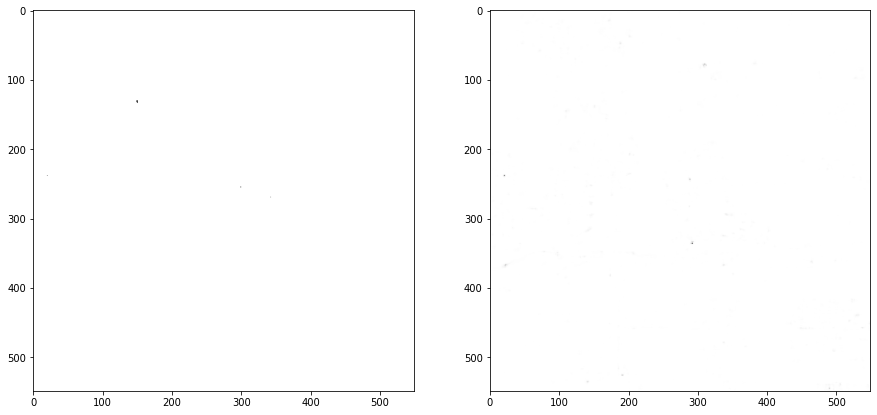

In [15]:
for file in files[0][:10]:
    end = file.split('/')[-1]
    file = path+end
    actual, pred = predict(model, file)
    save(actual, pred, end)

    #woah.. i might be on to something here.

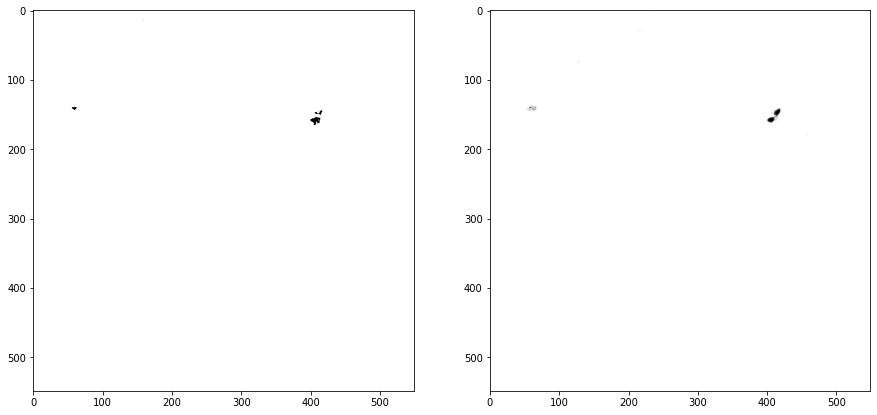

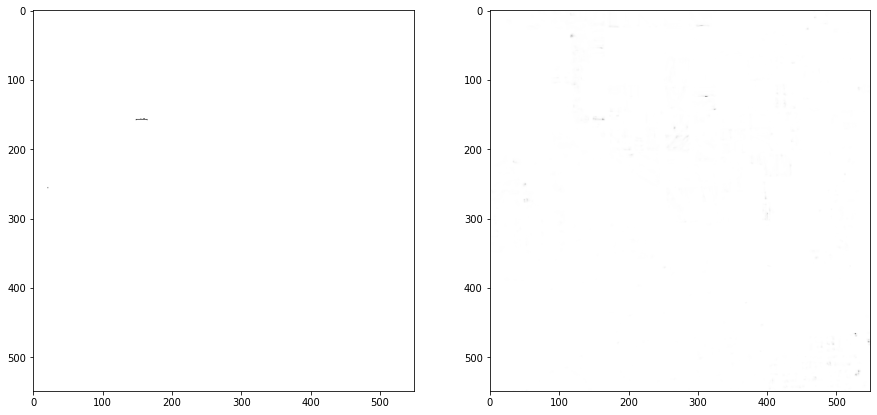

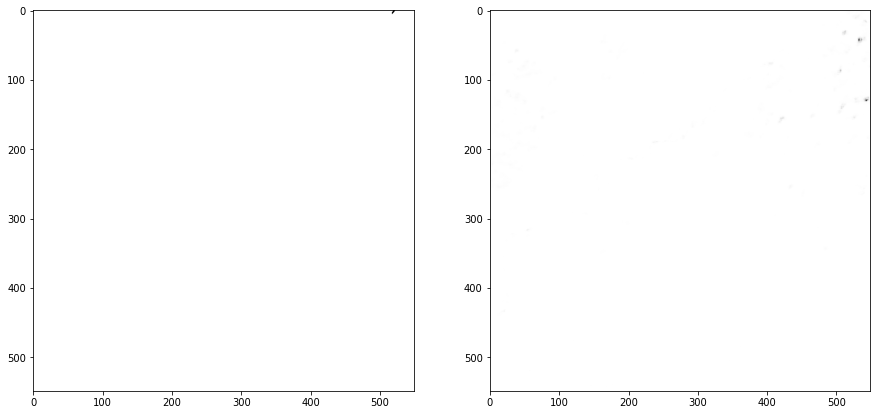

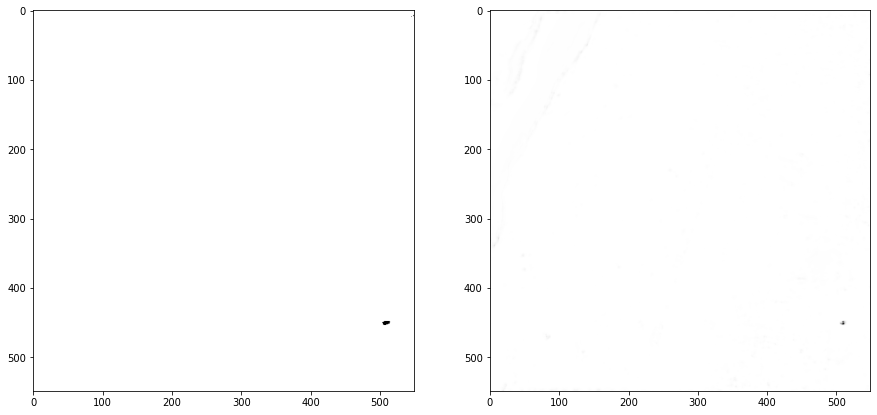

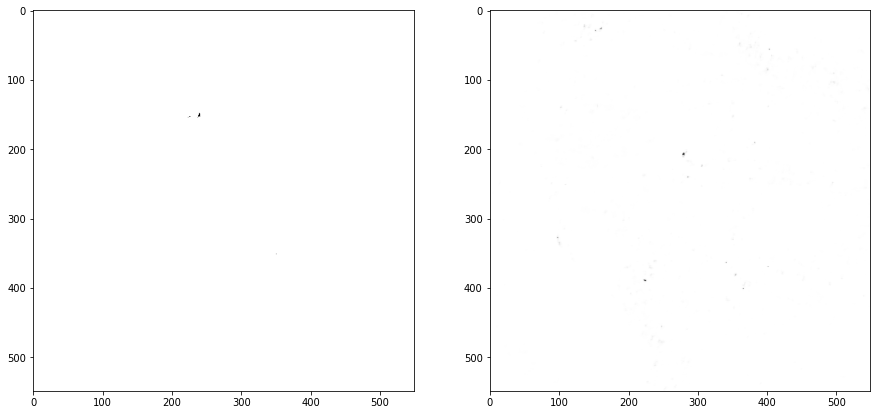

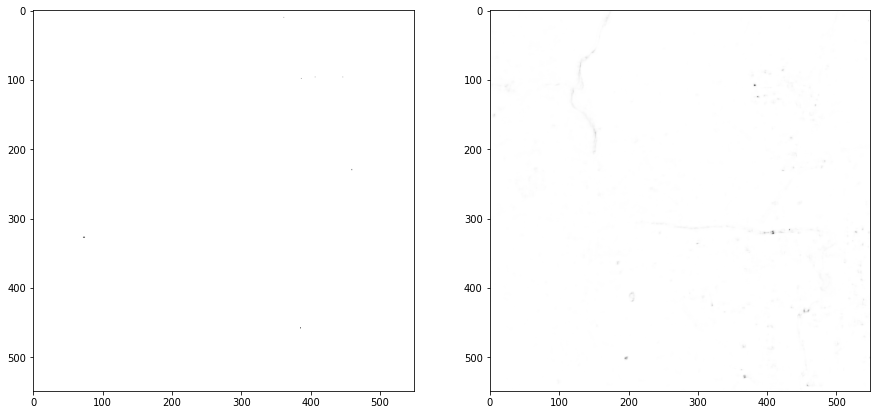

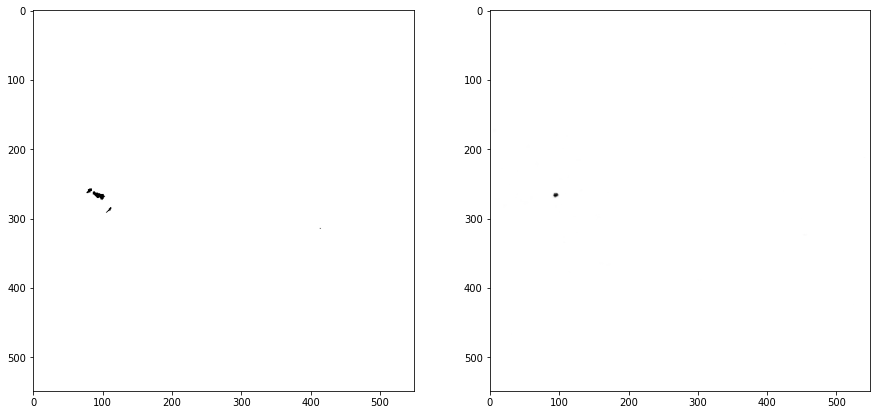

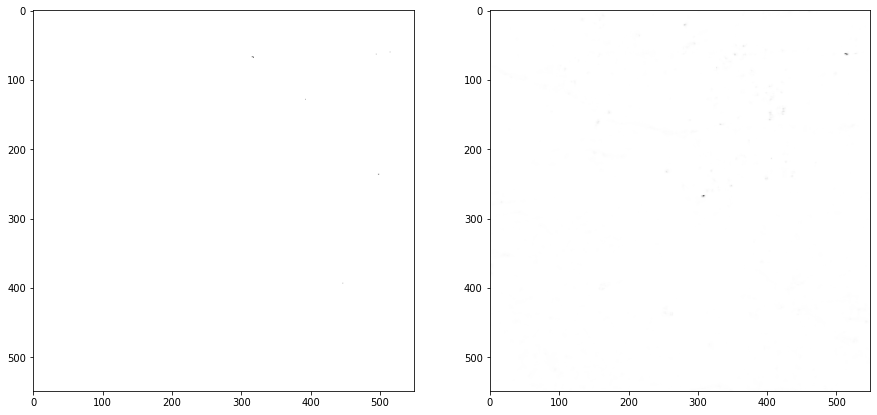

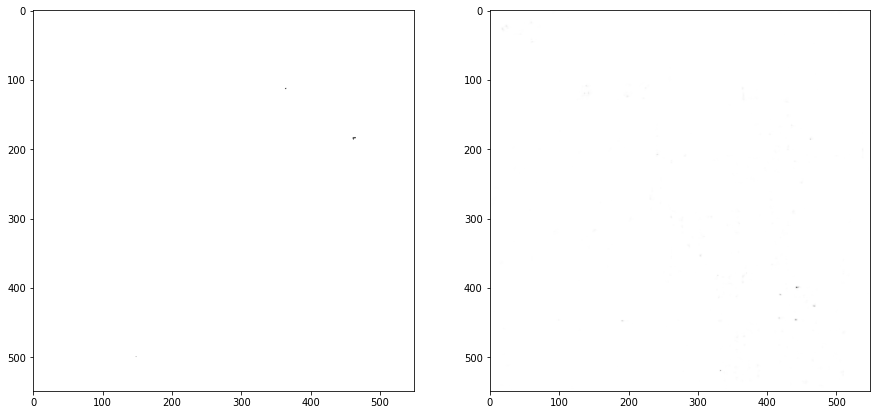

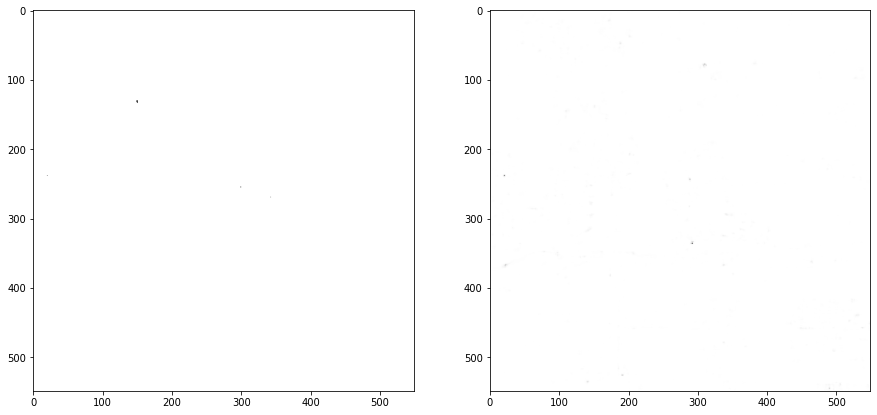

In [18]:
for file in files[0][:10]:
    end = file.split('/')[-1]
    file = path+end
    actual, pred = predict(model, file)
    visualize(actual, pred)
    save(actual, pred)